# Exercício 1 - Token Embeddings (Operações e Contextualização)

Conforme visto em sala de aula, existem várias técnicas de tokenização: word token, subword token, character token, byte token, dentre outras que podem obter resultados mistos. Esse Exercício abordará embeddings para word tokens, ou word embeddings. Nesse contexto, siga as instruções:

**a)** escolha no mínimo 2 grupos de palavras relacionadas, cada grupo contendo no mínimo 3 palavras.
Ex.:

*   Palavras relacionadas a paisagem
    *   ceu
    *   montanha
    *   rio
*   Palavras relacionadas a estudo
    *   caderno
    *   escola
    *   livro

**b)** Em seguida, obtenha os embeddings das palavras.

**c)** Utilize algum método de redução de dimensionalidade para reduzir os vetores dos embeddings para apenas 2 dimensões.

**d)** Faça o "plot" em um plano bidimensional com os valores obtidos, comparando os resultados referentes aos diferentes modelos.

**e)** Execute operações de soma e subtração com os vetores e observe os resultados obtidos.

**f)** Para comparar outras formas de gerar embeddings, utilize o modelo BERT de forma a gerar word embeddings a partir de frases e veja o resultado obtido.

**Sugestão:** Utilize bibliotecas para ter acesso a modelos pré-treinados

In [ ]:
# !pip install gensim

A seguir, exemplo de código utilizando a lib gensim para carregar vetores de modelos pré-treinados como GloVe e Word2vec.

In [1]:
# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# Usage suggestion
# Importing required libs
import numpy as np
import gensim.downloader as api
from gensim.models import KeyedVectors

# Printing the list of available models in gensim-data
print(list(api.info()["models"].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


Os modelos sugeridos GloVe e Word2vec estão disponíveis a partir de 'glove-wiki-gigaword-100' e 'word2vec-google-news-300', respectivamente. Deve demorar alguns minutos dependendo do tamanho do modelo que você escolher.

In [ ]:
# # Load the pre-trained model vectors using the "load()" method of the api object
# glove = api.load("fasttext-wiki-news-subwords-300")

# # Save the pre-trained model for reuse
# glove.save("glove_model.model")

In [2]:
glove = KeyedVectors.load("../models/glove_model.model")

In [3]:
# Check the size of a word vector
print(glove["casa"].shape)

(300,)


### **Exercício**
**a)** Escolha suas palavras, inicialmente em idioma inglês.

In [ ]:
# English words
words = [
    "student",
    "teacher",
    "paper",
    "book",
    "notebook",
    "laptop",
    "university",
    "course",
    "exchange",
    "science",
    "learning",
    "research",
    "education",
]

Agora obtenha os embeddings do modelo carregado anteriormente acessando a chave no vetor.

In [ ]:
# The model works like a dictionary, access the key corresponding to the token
# Get embeddings in a dictionary
emb_palavras = {word: glove[word] for word in words}
emb_palavras

# Printing the first 5 values ​​for each embedding
# print(emb_palavras[:, :5])

{'student': array([-5.6568e-02,  6.4876e-04,  6.0860e-02,  1.0752e-02, -1.1552e-02,
        -6.6364e-02,  2.5499e-02, -1.2159e-01,  8.8149e-02, -4.0149e-02,
         3.9893e-02,  7.4020e-04,  7.8832e-02,  4.4735e-02, -2.4260e-02,
         5.6595e-02,  6.8587e-02,  2.5037e-02,  3.9105e-02,  6.4854e-02,
         2.9919e-02,  6.9002e-02, -3.8209e-02,  6.7215e-02, -5.1773e-02,
         1.8131e-02, -1.9457e-02,  3.4926e-02, -8.0168e-03, -1.1301e-02,
         1.0423e-02,  2.2488e-03,  4.2361e-03, -1.0895e-02, -2.0003e-02,
         4.2685e-02,  3.2519e-02,  3.6706e-02,  1.0141e-03, -3.5115e-04,
         1.9556e-02, -9.7429e-02,  2.9501e-02,  1.4988e-02,  4.2061e-02,
         2.6522e-02,  5.5183e-02, -4.7938e-02, -2.8623e-02,  2.4995e-02,
         1.4879e-02,  1.2766e-02,  2.7079e-02,  3.9855e-02,  3.4777e-02,
         7.8763e-03, -3.9915e-02,  9.9666e-03, -1.7005e-02, -1.8460e-03,
         4.6363e-02,  1.2280e-02,  7.6400e-02,  7.1919e-02,  4.7603e-02,
        -6.0408e-02,  5.4660e-02, -2.962

Teste os modelos carregandos tentando imprimir algumas palavras em português veja o que acontece. Lembre que o modelo foi treinado sem caracteres acentuados ou case do caractere.

In [8]:
print(glove["terra"].shape)
pl_ptbb = glove["terra"]
print(pl_ptbb)

# print(w2v_v['gente'].shape)

(300,)
[-0.024405   -0.0043346  -0.011769    0.11453     0.023041   -0.09168
  0.0094031  -0.14461     0.0035586   0.069339   -0.050251   -0.011979
 -0.053855    0.019425   -0.047674    0.032493    0.17906     0.043017
  0.054907   -0.029625   -0.11605     0.049639    0.14474     0.037841
  0.14143     0.0010015   0.050475    0.052853    0.015726    0.0085179
 -0.00057323  0.070841   -0.028111    0.029294   -0.031062    0.010723
  0.056798   -0.031985    0.049969   -0.021129   -0.034351   -0.047213
  0.023057   -0.012029   -0.05057    -0.17281    -0.0068876   0.046897
 -0.1099     -0.1134      0.0054056  -0.057539    0.058319   -0.05241
 -0.039214    0.011012   -0.013798    0.031996    0.0034696   0.051652
 -0.034715    0.0052073   0.076233   -0.049084    0.11352    -0.13398
  0.057226    0.075949    0.083673    0.026268   -0.088492    0.040667
  0.042617    0.034032    0.1301     -0.071195   -0.10635    -0.083051
 -0.08793     0.034936    0.02056    -0.092008    0.078329    0.046256
 

Perceba que estamos utilizando modelos pré-treinados com corpus do idioma inglês. Portanto, no corpus ficaram faltando muitas palavras de outros idiomas como o português.

Faça o download do arquivo pré-treinado em Word2Vec do FastText no endereço https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.pt.vec e carregue-o em uma variável.

**Sugestão:** Faça o download com o comando wget e utilize o método load_word2vec_format() do KeyedVectors da lib gensim.

In [ ]:
# Download the file
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.pt.vec

--2025-09-08 15:13:21--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.pt.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.175.14.2, 3.175.14.70, 3.175.14.3, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.175.14.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1560834949 (1.5G) [binary/octet-stream]
Saving to: ‘wiki.pt.vec’

wiki.pt.vec         100%[===================>]   1.45G  2.42MB/s    in 12m 2s  

2025-09-08 15:25:51 (2.06 MB/s) - ‘wiki.pt.vec’ saved [1560834949/1560834949]



In [11]:
# Load the model from the downloaded file
fasttext_model = KeyedVectors.load_word2vec_format("../models/wiki.pt.vec")

Escolha suas palavras agora em português e salve em um vetor.

In [25]:
palavras = [
    "atleta",
    "jogo",
    "equipe",
    "corrida",
    "derrota",
    "campeonato",
    "partida",
    "jogador",
    "torcida",
    "campo",
    "esporte",
]

### **Exercício**
**b)** Crie um novo vetor que receberá os embeddings correspondentes às palavras em português que você escolheu.

In [26]:
embeddings_pt ={word: glove[word] for word in palavras}
embeddings_pt

{'atleta': array([ 0.040588  , -0.04174   , -0.019087  , -0.013648  ,  0.0036688 ,
        -0.0068764 ,  0.013459  , -0.05633   , -0.00064787, -0.049554  ,
         0.027616  , -0.089009  , -0.052024  , -0.015879  ,  0.053899  ,
         0.014449  ,  0.069402  , -0.036547  ,  0.10083   ,  0.036522  ,
        -0.043546  , -0.034406  ,  0.044861  ,  0.035952  , -0.027993  ,
        -0.0052391 ,  0.0096829 , -0.016147  , -0.0024298 , -0.00086765,
         0.066958  , -0.010058  ,  0.012297  ,  0.002497  ,  0.0020372 ,
         0.024119  ,  0.11578   ,  0.0069176 , -0.017212  ,  0.048317  ,
         0.030107  ,  0.016149  ,  0.015259  , -0.010435  ,  0.073447  ,
        -0.013229  ,  0.0065203 , -0.02875   , -0.0097851 , -0.019219  ,
         0.033142  , -0.034025  ,  0.064549  ,  0.020803  , -0.047502  ,
         0.0085306 ,  0.015247  , -0.0099717 , -0.043511  ,  0.0077427 ,
        -0.038495  , -0.004039  ,  0.052309  , -0.016913  ,  0.043676  ,
        -0.043636  ,  0.0046757 , -0.0054

### **Exercício**
**c)** Utilize algum método de redução de dimensionalidade para reduzir os vetores dos embeddings para apenas 2 dimensões.

**Sugestão:** Utilize o PCA do sklearn passando como parâmetro n_components=2.

In [ ]:
# Importing required libs
from sklearn.decomposition import PCA

# Reduce to 2 dimensions using PCA method
emb_pt_values = embeddings_pt.values()
emb_pt_values = np.array(list(emb_pt_values))

vectors_pca = PCA(n_components=2).fit_transform(emb_pt_values)
vectors_pca

### **Exercício**
**d)** Faça o "plot" em um plano bidimensional com os valores obtidos, se possível, comparando os resultados referentes a diferentes modelos.

**Sugestão:** Utilize o código da célula abaixo como exemplo de como efetuar o plot, sendo necessário ajustar a variável que contém os vetores PCA, bem como os rótulos com as palavras selecionadas.

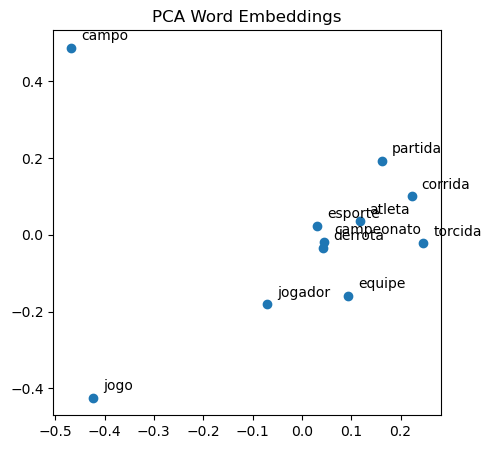

In [ ]:
# Plotting
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(vectors_pca[:, 0], vectors_pca[:, 1])

for i, p in enumerate(palavras):
    axes.annotate(p, (vectors_pca[i, 0] + 0.02, vectors_pca[i, 1] + 0.02))

axes.set_title("PCA Word Embeddings")
plt.show()

Agora que você já sabe, faça um teste com outras palavras e veja como fica o plot do gráfico.

In [85]:
# Inicie aqui definindo suas variáveis

others_words = [
    "chute",
    "gol",
    "pista",
    "quadra",
    "rede",
    "atacar",
    "defesa",
    "grupo",
    "marcar",
    "passo",
    "salto",
    "tecnico",
    "tempo",
    "bola",
    "cesta",
    "golfe",
    "luta",
    "aluno",
    "professor",
    "papel",
    "livro",
    "notebook",
    "universidade",
    "curso",
    "pesquisa",
]

embeddings_pt ={word: glove[word] for word in others_words}

# Reduce to 2 dimensions using PCA method
emb_pt_values = embeddings_pt.values()
emb_pt_values = np.array(list(emb_pt_values))

vectors_pca = PCA(n_components=3).fit_transform(emb_pt_values)
vectors_pca

array([[-0.29406467, -0.9020923 ,  0.26355457],
       [ 0.7502263 ,  0.07411859,  0.13182233],
       [ 0.16099817, -0.0924198 , -0.00489123],
       [-0.10592088,  0.01248807,  0.00995652],
       [ 0.1276735 , -0.039854  ,  0.16723931],
       [-0.06399292,  0.09729622,  0.00439458],
       [ 0.0083351 ,  0.04226492,  0.03549082],
       [-0.0531083 ,  0.29481432, -0.0991194 ],
       [-0.13659957, -0.05323389, -0.0085763 ],
       [ 0.05271194, -0.0220691 , -0.06052302],
       [ 0.13482863, -0.18281901, -0.04700217],
       [-0.11392928,  0.15176064, -0.08862911],
       [ 0.05308617, -0.28985763, -0.9439232 ],
       [ 0.49359775, -0.26211315,  0.11266796],
       [ 0.26157808, -0.10938213,  0.14558206],
       [-0.08796147, -0.03889321,  0.09792209],
       [ 0.32747495,  0.25650343, -0.03404515],
       [-0.13759215,  0.1676479 ,  0.00880098],
       [-0.46506616,  0.13842888,  0.09879213],
       [-0.12589106,  0.05855738,  0.1155268 ],
       [-0.05249501,  0.23524275,  0.102

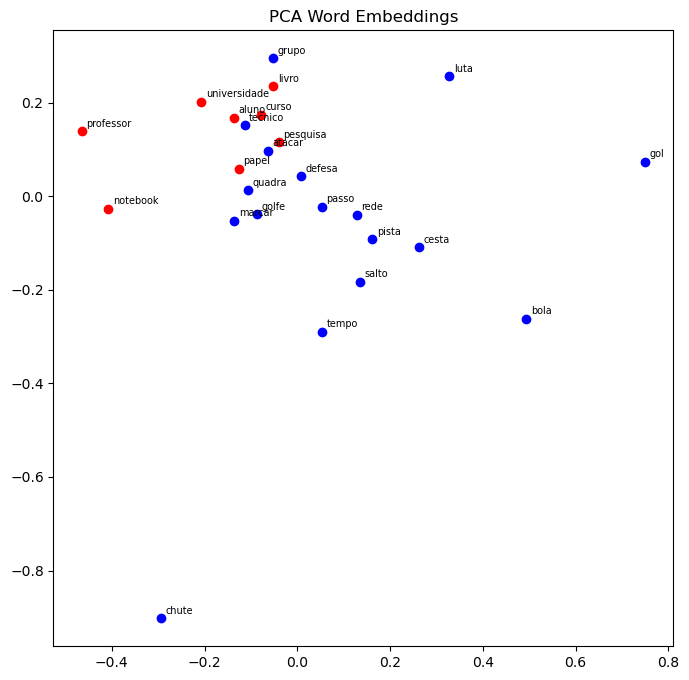

In [93]:
# Plotting
fig, axes = plt.subplots(1, 1, figsize=(8, 8))

axes.scatter(vectors_pca[:17, 0], vectors_pca[:17, 1], color="blue")
axes.scatter(vectors_pca[17:, 0], vectors_pca[17:, 1], color="red")

for i, p in enumerate(others_words):
    axes.annotate(p, (vectors_pca[i, 0] + 0.01, vectors_pca[i, 1] + 0.01), fontsize=7)

axes.set_title("PCA Word Embeddings")
plt.show()

### Word2Vec algebra
### **Exercício**

**e)** Execute operações de soma e subtração com os vetores e observe os resultados obtidos.

**Sugestão:** Você pode utilizar o método "most_similar()" do modelo, utilizando os parâmetros "positive" e "negative" para operações de soma e subtração. O parâmetro "topn" controla a quantidade de resultados.

**Observação:** Caso prefira utilizar numpy para as operações, ao chamar o método "most_similar()" utilize o parâmetro "vector".

In [ ]:
# Define the words
palavra1 = ""
palavra2 = ""
palavra3 = ""

# Perform the algebraic operation


# Display the result of the similarity search

Espaço para testar mais operações

In [ ]:
# Defina as palavras

# Efetue a operação algébrica

# Exiba o resultado da busca por similaridade

### Word2Vec vs BERT: Embeddings em contextos diferentes

Nos modelos representativos mais complexos, como o BERT, o cáculo dos valores de embedding de uma palavra pode depender dramáticamente da aplicação na frase. Isso não é por acaso e faz total sentido, pois a semântica pode ser totalmente diferente.

Por exemplo, observe a plavra 'manga' nas duas senteças abaixo:


*   "Sujei a manga da minha camisa."
*   "Quero comer manga com leite."


Vamos testar o quanto o modelo consegue capturar o contexto na tokenização incluindo agora o BERT.

### **Exercício**
**f)** Para comparar outras formas de gerar embeddings, utilize o modelo BERT de forma a gerar word embeddings a partir de frases e veja o resultado obtido.

O código a seguir vai auxiliar na instanciação do modelo BERT e definição de uma função para ter acesso facilitado aos embeddings do modelo.


In [ ]:
# Imports
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity


tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")


# Função para obter os embeddings do BERT
def get_bert_embeddings(sentence, word):
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model(**inputs)
    last_hidden_states = outputs.last_hidden_state
    word_tokens = tokenizer.tokenize(sentence)
    word_index = word_tokens.index(word)
    word_embedding = last_hidden_states[0, word_index + 1, :]
    return word_embedding

### **Exercício**
**f)** (Detalhamento) Defina duas sentenças que contenham uma mesma palavra em ambas, porém com semântica diferente. Em seguide calcule os embeddings da mesma palavra nas duas sentenças, para finalmente comparar os resultados.

**Dica:** Utilize o método definido anteriormente, passando a sentença e a palavra que você deseja obter o embedding.

In [ ]:
# Defina suas sentenças
sentenca1 = ""
sentenca2 = ""

# Defina a palavra foco


# Calcule os embeddings da palavra nas duas situações


# Imprima os embeddings calculados


# Em adicional, calcule a similaridade